In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import normalization
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import support_file as sf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   393 non-null    float64
 1   Time on App           393 non-null    float64
 2   Time on Website       393 non-null    float64
 3   Length of Membership  393 non-null    float64
 4   Yearly Amount Spent   393 non-null    float64
dtypes: float64(5)
memory usage: 15.5 KB
None


Import data

In [2]:
data = pd.read_csv("Ecommerce Customers.csv")


data_norm = normalization.normalized_dataframe
print(data_norm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   393 non-null    float64
 1   Time on App           393 non-null    float64
 2   Time on Website       393 non-null    float64
 3   Length of Membership  393 non-null    float64
 4   Yearly Amount Spent   393 non-null    float64
dtypes: float64(5)
memory usage: 15.5 KB
None


One-Hot-Kodierung

In [3]:
"""
data_hot_clustering = sf.data_hot_clustering
#data_hot_clustering = pd.concat([data_norm, dummies], axis=1)


data_hot_clustering = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","HIGH","MEDIUM","LOW"]]
print(data_hot_clustering.head(5))
"""

'\ndata_hot_clustering = sf.data_hot_clustering\n#data_hot_clustering = pd.concat([data_norm, dummies], axis=1)\n\n\ndata_hot_clustering = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","HIGH","MEDIUM","LOW"]]\nprint(data_hot_clustering.head(5))\n'

Layman's method

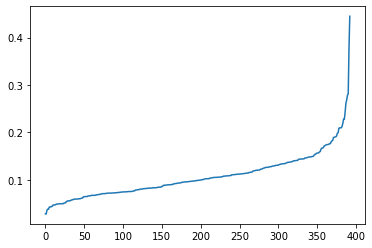

In [13]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_norm)
distances, indices = nbrs.kneighbors(data_norm)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

In [7]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
clusters = dbscan.fit_predict(data_norm)
#print(clusters)

Layman's method for only two dimensions

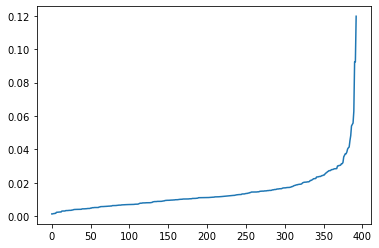

In [8]:
x = data_norm.iloc[:,[3,4]]

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

DBSCAN visualisation with two dimensions

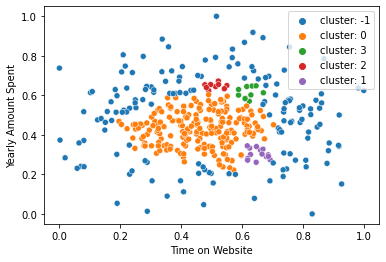

In [12]:
X = data_norm.iloc[:,[2,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_

sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.show()






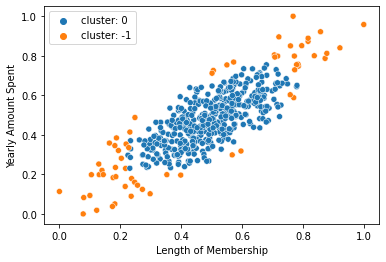

In [24]:
X = data_norm.iloc[:,[3,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_

sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.show()

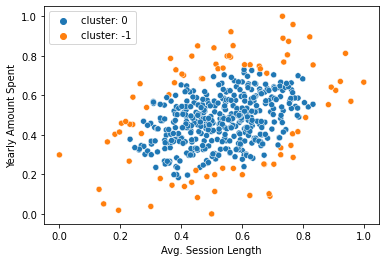

In [25]:
X = data_norm.iloc[:,[0,4]]

dbscan = DBSCAN(eps=0.05, min_samples=10)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_
#print(clusters)

sns.scatterplot(X.iloc[:,0], X.iloc[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.show()